# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance (accuracy, precision, recall, and f-score) as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client for a any sepcific number of clients of your choice. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random

In [54]:
# Set seed for Python's built-in random number generator

# Set seed for numpy. Put your SID instead of number '42'
np.random.seed(1903540)
# Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
random.seed(1903540)

# Set seed for TensorFlow tf.random.set_seed(42)
# Put your SID instead of number '42'
tf.random.set_seed(1903540)

K.clear_session() # Set seed for Keras

In [55]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [56]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [57]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Two clients

In [58]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, 
                                                                  #random_state=1903540,
                                                  # SID 1903540                
                                                                  random_state= 1903540
                                                                 )

In [59]:
print(x_train_c1.shape)
print(x_train_c2.shape)
print(y_train_c1.shape)
print(y_train_c2.shape)

(30000, 28, 28, 1)
(30000, 28, 28, 1)
(30000,)
(30000,)


In [60]:
# Federated averaging

def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

In [61]:
# Aggregate models

aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

In [62]:
# Create global model and set weights

global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [63]:
# Evaluate global model

test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.4415 - accuracy: 0.8767 - 2s/epoch - 7ms/step
Test accuracy: 0.8766999840736389


In [64]:
test_accuracy = []

In [65]:
test_accuracy.append(0.8766999840736389)

In [66]:
test_accuracy

[0.8766999840736389]

Calcuating Precision, recall and F-score

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 2s 5ms/step
(10000, 10)


In [70]:
from sklearn.metrics import classification_report

# Assuming y_test contains the true labels and predictions contains the predicted labels
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.99      0.95      0.97      1135
           2       0.73      0.94      0.82      1032
           3       0.76      0.97      0.85      1010
           4       0.96      0.88      0.92       982
           5       0.76      0.94      0.84       892
           6       1.00      0.58      0.73       958
           7       0.91      0.90      0.91      1028
           8       0.94      0.79      0.86       974
           9       0.96      0.82      0.88      1009

    accuracy                           0.88     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.88      0.88     10000



In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test contains the true labels and predictions contains the predicted labels
print("Accuracy test set: ", accuracy_score(y_test, predictions))
print("Precision test set: ", precision_score(y_test, predictions, average='weighted'))
print("Recall test set: ", recall_score(y_test, predictions, average='weighted'))
print("F-score test set: ", f1_score(y_test, predictions, average='weighted'))

Accuracy test set:  0.8767
Precision test set:  0.894674405348398
Recall test set:  0.8767
F-score test set:  0.8752646229789867


In [73]:
test_precision = []
test_recall    = []
test_f1_score  = []

In [74]:
test_precision.append(0.894674405348398)
test_recall.append(0.8767)
test_f1_score.append(0.8752646229789867)

Displaying the confusion matrix between actual and predicted values on test data.

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

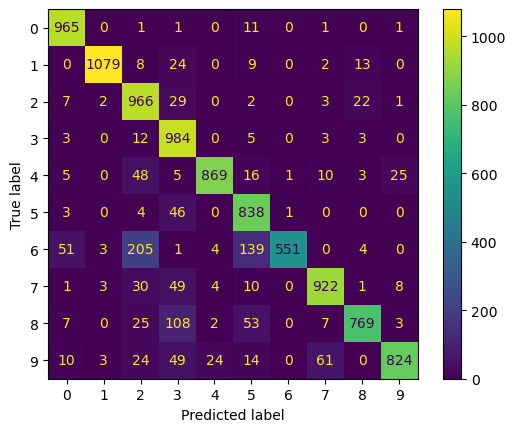

In [76]:
# display the confusion matrix between test output and predicted output

cm = confusion_matrix(y_test, predictions) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot();
#plt.show()

# Lab Logbook requirement: Document the following in lablogbook

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.




Splitting data into 4 clients

In [77]:
Client_1 = (x_train[0:15000], y_train[0:15000])
Client_2 = (x_train[15000:30000], y_train[15000:30000])
Client_3 = (x_train[30000:45000], y_train[30000:45000])
Client_4 = (x_train[45000:], y_train[45000:])

In [78]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)

(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [79]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])

In [ ]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights

In [82]:
def federated_average_weights(*weights_list):
    num_clients = len(weights_list)
    num_layers = len(weights_list[0])  # Assuming all clients have the same number of layers

    # Initialize a list to store the averaged weights
    averaged_weights = []

    # Loop through each layer
    for layer_idx in range(num_layers):
        # Initialize a numpy array to accumulate weights from all clients for the current layer
        layer_accumulated_weights = np.zeros_like(weights_list[0][layer_idx])

        # Loop through each client
        for client_weights in weights_list:
            layer_accumulated_weights += client_weights[layer_idx]

        # Calculate the averaged weights for the current layer
        averaged_layer_weights = layer_accumulated_weights / num_clients

        # Append the averaged weights for the current layer to the list
        averaged_weights.append(averaged_layer_weights)

    return averaged_weights


In [83]:
# Aggregating the models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights())

# Creating global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [84]:
# Evaluating the global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 2.2430 - accuracy: 0.3225 - 2s/epoch - 6ms/step
Test accuracy: 0.32249999046325684


In [85]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 2s 5ms/step
(10000, 10)


In [86]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

Accuracy test set:  0.3225
Precision test set:  0.34580819838764465
Recall test set:  0.3225
F-score test set:  0.2913805607745686
              precision    recall  f1-score   support

           0       0.41      0.09      0.15       980
           1       0.29      0.59      0.39      1135
           2       0.23      0.12      0.16      1032
           3       0.17      0.17      0.17      1010
           4       0.48      0.62      0.54       982
           5       0.38      0.68      0.49       892
           6       0.47      0.14      0.22       958
           7       0.25      0.43      0.31      1028
           8       0.43      0.12      0.19       974
           9       0.39      0.25      0.31      1009

    accuracy                           0.32     10000
   macro avg       0.35      0.32      0.29     10000
weighted avg       0.35      0.32      0.29     10000



In [87]:
test_accuracy.append(0.32249999046325684)
test_precision.append(0.34580819838764465)
test_recall.append(0.3225)
test_f1_score.append(0.2913805607745686)

In [88]:
print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8766999840736389, 0.32249999046325684]
[0.894674405348398, 0.34580819838764465]
[0.8767, 0.3225]
[0.8752646229789867, 0.2913805607745686]


Splitting data into 6 clients

In [89]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [90]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

In [91]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Creating global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [92]:
# Evaluating the global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 3s - loss: 1.9453 - accuracy: 0.7398 - 3s/epoch - 10ms/step
Test accuracy: 0.739799976348877
313/313 [==============================] - 2s 6ms/step
(10000, 10)
Accuracy test set:  0.7398
Precision test set:  0.764780851204208
Recall test set:  0.7398
F-score test set:  0.7338617030156441
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       980
           1       0.65      0.99      0.78      1135
           2       0.65      0.67      0.66      1032
           3       0.92      0.44      0.59      1010
           4       0.76      0.84      0.80       982
           5       0.72      0.79      0.75       892
           6       0.73      0.73      0.73       958
           7       0.68      0.92      0.79      1028
           8       0.73      0.58      0.65       974
           9       0.84      0.65      0.73      1009

    accuracy                           0.74     10000
   macro avg       0.77      0.74      0.73     100

In [97]:
test_accuracy.append(0.739799976348877)
test_precision.append(0.764780851204208)
test_recall.append(0.7272)
test_f1_score.append(0.7338617030156441)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8766999840736389, 0.32249999046325684, 0.7271999716758728, 0.739799976348877]
[0.894674405348398, 0.34580819838764465, 0.7834205071021751, 0.764780851204208]
[0.8767, 0.3225, 0.7272, 0.7272]
[0.8752646229789867, 0.2913805607745686, 0.7308748558259915, 0.7338617030156441]


Splitting data into 8 clients

In [98]:
Client_1 = (x_train[0:7500], y_train[0:7500])
Client_2 = (x_train[7500:15000], y_train[7500:15000])
Client_3 = (x_train[15000:22500], y_train[15000:22500])
Client_4 = (x_train[22500:30000], y_train[22500:30000])
Client_5 = (x_train[30000:37500], y_train[30000:37500])
Client_6 = (x_train[37500:45000], y_train[37500:45000])
Client_7 = (x_train[45000:52500], y_train[45000:52500])
Client_8 = (x_train[52500:], y_train[52500:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])

(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)


In [99]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, 
                              weights5, weights6, weights7, weights8):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8 in zip(weights1, weights2, weights3, weights4, 
                                              weights5, weights6, weights7, weights8):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 +w8) / 8)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [100]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 2s - loss: 1.8167 - accuracy: 0.7102 - 2s/epoch - 7ms/step
Test accuracy: 0.7102000117301941
313/313 [==============================] - 2s 6ms/step
(10000, 10)
Accuracy test set:  0.7102
Precision test set:  0.795724636386013
Recall test set:  0.7102
F-score test set:  0.699664301141731
              precision    recall  f1-score   support

           0       0.98      0.31      0.48       980
           1       0.91      0.97      0.94      1135
           2       0.67      0.86      0.75      1032
           3       0.88      0.78      0.83      1010
           4       0.83      0.81      0.82       982
           5       0.55      0.89      0.68       892
           6       0.92      0.76      0.83       958
           7       0.42      0.91      0.58      1028
           8       0.95      0.51      0.66       974
           9       0.82      0.26      0.40      1009

    accuracy                           0.71     10000
   macro avg       0.79      0.71      0.70     1000

In [106]:
test_accuracy.append(0.7102000117301941)
test_precision.append(0.795724636386013)
test_recall.append(0.7102)
test_f1_score.append(0.699664301141731)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8766999840736389, 0.32249999046325684, 0.7271999716758728, 0.739799976348877, 0.6028000116348267, 0.7102000117301941]
[0.894674405348398, 0.34580819838764465, 0.7834205071021751, 0.764780851204208, 0.7986126719530607, 0.795724636386013]
[0.8767, 0.3225, 0.7272, 0.7272, 0.6028, 0.7102]
[0.8752646229789867, 0.2913805607745686, 0.7308748558259915, 0.7338617030156441, 0.5536289939655649, 0.699664301141731]


Splitting data into 10 clients

In [102]:
Client_1 = (x_train[0:6000], y_train[0:6000])
Client_2 = (x_train[6000:12000], y_train[6000:12000])
Client_3 = (x_train[12000:18000], y_train[12000:18000])
Client_4 = (x_train[18000:24000], y_train[18000:24000])
Client_5 = (x_train[24000:30000], y_train[24000:30000])
Client_6 = (x_train[30000:36000], y_train[30000:36000])
Client_7 = (x_train[36000:42000], y_train[36000:42000])
Client_8 = (x_train[42000:48000], y_train[42000:48000])
Client_9 = (x_train[48000:54000], y_train[48000:54000])
Client_10 = (x_train[54000:], y_train[54000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)
print(Client_9[0].shape)
print(Client_10[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)
print(Client_9[1].shape)
print(Client_10[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()
client9_model = create_client_model()
client10_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])
client9_model = train_client_model(client9_model, Client_9[0], Client_9[1])
client10_model = train_client_model(client10_model, Client_10[0], Client_10[1])

(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)


In [104]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5,
                              weights6, weights7, weights8, weights9, weights10):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 in zip(weights1, weights2, weights3, weights4, 
                                                      weights5, weights6, weights7, weights8, 
                                                      weights9, weights10):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10) / 10)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights(),
                                               client9_model.get_weights(),
                                               client10_model.get_weights())

# Creating global model and setting weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [105]:
# Evaluating global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 2s - loss: 1.8632 - accuracy: 0.5288 - 2s/epoch - 8ms/step
Test accuracy: 0.5288000106811523
313/313 [==============================] - 2s 6ms/step
(10000, 10)
Accuracy test set:  0.5288
Precision test set:  0.7204391515563311
Recall test set:  0.5288
F-score test set:  0.479274646548347
              precision    recall  f1-score   support

           0       0.98      0.16      0.28       980
           1       0.90      0.91      0.91      1135
           2       0.44      0.94      0.60      1032
           3       0.99      0.11      0.19      1010
           4       0.78      0.80      0.79       982
           5       0.22      0.96      0.36       892
           6       0.97      0.03      0.06       958
           7       0.92      0.87      0.89      1028
           8       0.00      0.00      0.00       974
           9       0.92      0.44      0.60      1009

    accuracy                           0.53     10000
   macro avg       0.71      0.52      0.47     100

C:\Users\Benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Benja\anaconda3\lib\site-packages\sklearn\metrics\_classifi

In [107]:
test_accuracy.append(0.5288000106811523)
test_precision.append(0.7204391515563311)
test_recall.append(0.5288)
test_f1_score.append(0.479274646548347)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8766999840736389, 0.32249999046325684, 0.7271999716758728, 0.739799976348877, 0.6028000116348267, 0.7102000117301941, 0.5288000106811523]
[0.894674405348398, 0.34580819838764465, 0.7834205071021751, 0.764780851204208, 0.7986126719530607, 0.795724636386013, 0.7204391515563311]
[0.8767, 0.3225, 0.7272, 0.7272, 0.6028, 0.7102, 0.5288]
[0.8752646229789867, 0.2913805607745686, 0.7308748558259915, 0.7338617030156441, 0.5536289939655649, 0.699664301141731, 0.479274646548347]


In [138]:
#Splitting data into 8 clients
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_5 = (x_train[50000:60000], y_train[50000:60000])
Client_6 = (x_train[60000:70000], y_train[60000:70000])
Client_7 = (x_train[70000:80000], y_train[70000:80000])
Client_8 = (x_train[70000:], y_train[70000:])

In [139]:
Client_3[1].size

10000

In [140]:
Client_3[1]

array([4, 4, 4, ..., 6, 7, 1], dtype=uint8)

In [141]:
### Client_2 is assumed dishonest and changing the training data. Some labels are set as 4 
### Change the first 2000 labels

Client_3[1][:2000] = 4

In [142]:
Client_2[1]

array([3, 8, 7, ..., 1, 4, 2], dtype=uint8)

In [143]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(0, 28, 28, 1)
(0,)
(0,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(0,)
(0,)
(0,)


In [ ]:
def train_client_model(model, x_train, y_train, epochs=5):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model

In [ ]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])

In [ ]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8) / 8)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights())

# Creating global model and setting weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
# Evaluating global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

In [ ]:
test_accuracy_dishonest  = []
test_precision_dishonest = []
test_recall_dishonest    = []
test_f1_score_dishonest  = []

In [ ]:
test_accuracy_dishonest.append(test_accuracy[2])
test_precision_dishonest.append(test_precision[2])
test_recall_dishonest.append(test_recall[2])
test_f1_score_dishonest.append(test_f1_score[2])

test_accuracy_dishonest.append(0.7197999954223633)
test_precision_dishonest.append(0.7649681801937827)
test_recall_dishonest.append(0.7198)
test_f1_score_dishonest.append(0.7079021148713025)

print(test_accuracy_dishonest)
print(test_precision_dishonest)
print(test_recall_dishonest)
print(test_f1_score_dishonest)

In [ ]:
### Plot the model's performance for the 8 clients, one of them (number=3) is dishonest

ErrorMetrics = []
ErrorMetrics.append(test_accuracy_dishonest)
ErrorMetrics.append(test_precision_dishonest)
ErrorMetrics.append(test_recall_dishonest)
ErrorMetrics.append(test_f1_score_dishonest)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = ['All are honest', '#3 is dishonest']
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

In [ ]:
ErrorMetrics_pd.plot.bar(width=0.9, alpha=0.9)

# Challenges (Optional):

## The above code is for one communication round. Write code for multiple communication rounds. In each communication round, clients will train the model on a new dataset. Then the server will merge all these models. Subsequently, the clients will retrain the merged model in the next communication round.

